### Exploratory Data Analysis

##### Imports

In [5]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.stats import boxcox
import os

##### Exploring the Data

In [6]:
dp = os.path.join("..","data", "raw","Time-Wasters on Social Media.csv")
df = pd.read_csv(dp)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

Info reveals no missing values. <br>
12 Object cols -> Convert to numeric representations for easy processing

In [4]:
df.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


Misspelling of Brazil -> Barzil <br>
Time columns: Can convert to datetime object? <br>

In [5]:
df.describe()

,UserID,Age,Income,Total Time Spent,Number of Sessions,Video ID,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,ProductivityLoss,Satisfaction,Self Control,Addiction Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.986000,59524.213000,151.406000,10.013000,4891.738000,15.214000,4997.159000,5.129000,14.973000,25.248000,49.774000,5.136000,4.864000,7.094000,2.906000
std,288.819436,13.497852,23736.212925,83.952637,5.380314,2853.144258,8.224953,2910.053701,2.582834,8.200092,14.029159,29.197798,2.122265,2.122265,2.058495,2.058495
min,1.000000,18.000000,20138.000000,10.000000,1.000000,11.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,250.750000,29.000000,38675.250000,78.000000,6.000000,2542.000000,8.000000,2415.750000,3.000000,8.000000,14.000000,23.000000,3.000000,4.000000,5.000000,2.000000
50%,500.500000,42.000000,58805.000000,152.000000,10.000000,4720.500000,15.000000,5016.000000,5.000000,15.000000,25.000000,50.000000,5.000000,5.000000,7.000000,3.000000
75%,750.250000,52.000000,79792.250000,223.000000,15.000000,7346.000000,22.000000,7540.250000,7.000000,22.000000,37.000000,74.000000,6.000000,7.000000,8.000000,5.000000
max,1000.000000,64.000000,99676.000000,298.000000,19.000000,9997.000000,29.000000,9982.000000,9.000000,29.000000,49.000000,99.000000,9.000000,9.000000,10.000000,7.000000


Data Cleaning and Standardization

In [6]:
df = df.drop_duplicates()

# Standardizing
df['Gender'] = df['Gender'].str.strip().str.title()
df['Location'] = df['Location'].str.strip().str.title()
df['Profession'] = df['Profession'].str.strip().str.title()
df['Demographics'] = df['Demographics'].str.strip().str.title()
df['Platform'] = df['Platform'].str.strip().str.title()
df['Video Category'] = df['Video Category'].str.strip().str.title()
df['Frequency'] = df['Frequency'].str.strip().str.title()
df['Watch Reason'] = df['Watch Reason'].str.strip().str.title()
df['DeviceType'] = df['DeviceType'].str.strip().str.title()
df['OS'] = df['OS'].str.strip().str.title()
df['CurrentActivity'] = df['CurrentActivity'].str.strip().str.title()
df['ConnectionType'] = df['ConnectionType'].str.strip().str.title()

df['Location'] = df['Location'].str.replace("Barzil", "Brazil", case=False)

# Boolean -> Int
df['Debt'] = df['Debt'].astype(int)
df['Owns Property'] = df['Owns Property'].astype(int)

# Time
df['Watch Time'] = pd.to_datetime(df['Watch Time'], format='%I:%M %p', errors='coerce')
df['Watch Hour'] = df['Watch Time'].dt.hour
df['Watch Time'] = df['Watch Time'].dt.time

# Feature Engineering
df['Time per Session'] = (df['Total Time Spent'] / df['Number of Sessions']).round(2)
df['Engagement Efficiency'] = (df['Engagement'] / df['Total Time Spent']).round(3)
df['Videos per Session'] = (df['Number of Videos Watched'] / df['Number of Sessions']).round(2)
df['Video Consumption Ratio'] = (df['Time Spent On Video'] / df['Total Time Spent']).round(3)

def categorize_hour(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df['Time of Day']  = df['Watch Hour'].apply(categorize_hour)

df

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,Self Control,Addiction Level,CurrentActivity,ConnectionType,Watch Hour,Time per Session,Engagement Efficiency,Videos per Session,Video Consumption Ratio,Time of Day
0,1,56,Male,Pakistan,82812,1,1,Engineer,Rural,Instagram,...,5,5,Commuting,Mobile Data,21,4.71,98.338,1.29,0.325,Night
1,2,46,Female,Mexico,27999,0,1,Artist,Urban,Instagram,...,7,3,At School,Wi-Fi,17,16.29,26.070,2.21,0.110,Evening
2,3,32,Female,United States,42436,0,1,Engineer,Rural,Facebook,...,8,2,At Home,Mobile Data,14,5.00,289.133,1.17,0.300,Afternoon
3,4,60,Male,Brazil,62963,1,0,Waiting Staff,Rural,Youtube,...,5,5,Commuting,Mobile Data,21,5.32,24.525,2.16,0.059,Night
4,5,25,Male,Pakistan,22096,0,1,Manager,Urban,Tiktok,...,10,0,At Home,Mobile Data,8,22.67,22.743,3.50,0.096,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,22,Male,India,74254,1,1,Students,Rural,Tiktok,...,10,0,At Work,Mobile Data,17,20.57,35.965,2.43,0.118,Evening
996,997,40,Female,Pakistan,27006,0,0,Waiting Staff,Urban,Facebook,...,10,0,At Home,Mobile Data,22,15.40,7.805,1.13,0.009,Night
997,998,27,Male,India,94218,1,1,Waiting Staff,Rural,Tiktok,...,10,0,Commuting,Mobile Data,22,165.00,56.303,28.00,0.055,Night
998,999,61,Male,Pakistan,85344,1,0,Students,Urban,Youtube,...,5,5,At Work,Wi-Fi,22,13.73,13.576,2.73,0.079,Night


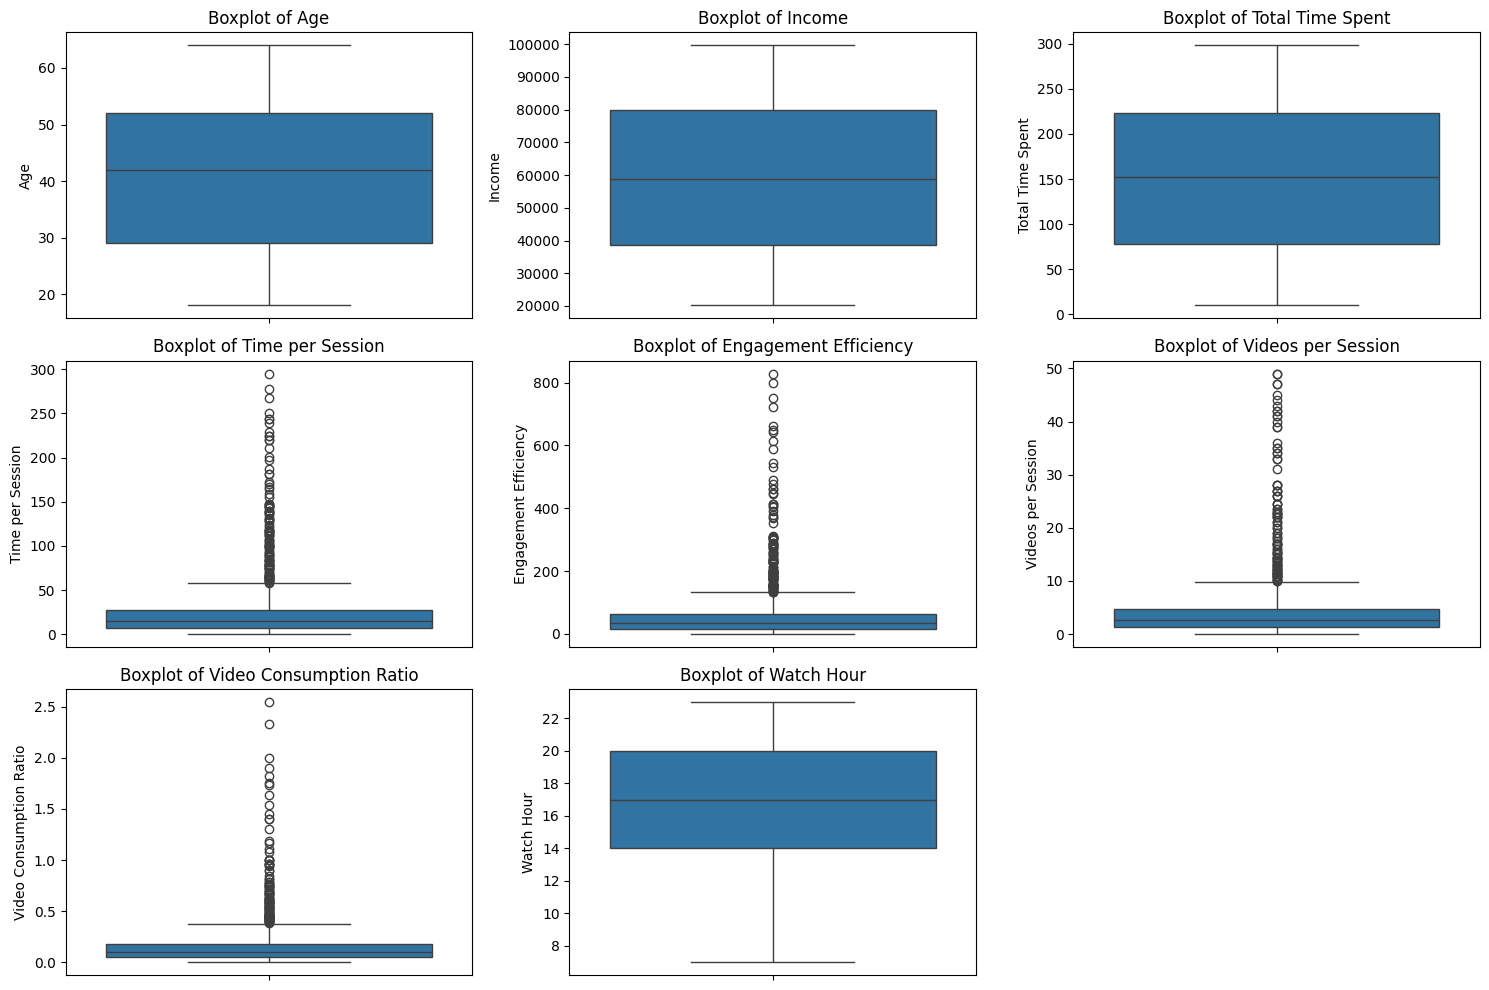

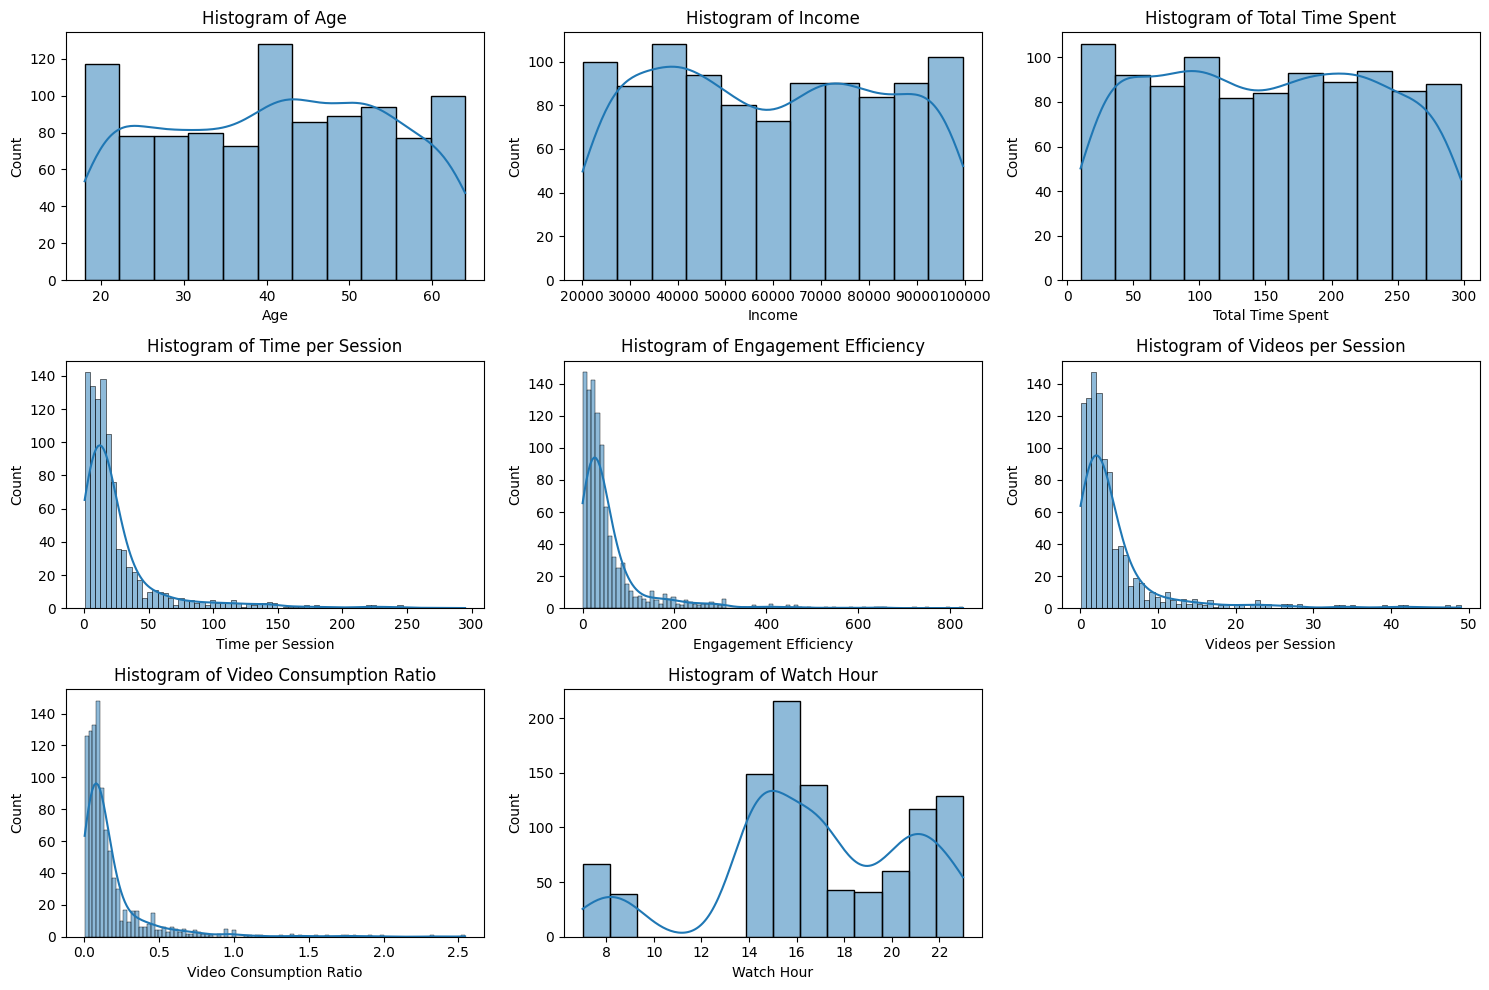

Summary statistics for scaled features:
                Age        Income  Total Time Spent  Time per Session  \
count  1.000000e+03  1.000000e+03      1.000000e+03      1.000000e+03   
mean   2.202682e-16 -1.385558e-16     -6.039613e-17     -1.776357e-17   
std    1.000500e+00  1.000500e+00      1.000500e+00      1.000500e+00   
min   -1.703790e+00 -1.660160e+00     -1.685197e+00     -6.918274e-01   
25%   -8.884375e-01 -8.788005e-01     -8.748115e-01     -5.142098e-01   
50%    7.516066e-02 -3.031540e-02      7.078958e-03     -3.138401e-01   
75%    8.163900e-01  8.543140e-01      8.532171e-01     -4.989131e-03   
max    1.705865e+00  1.692430e+00      1.747025e+00      6.710539e+00   

       Engagement Efficiency  Videos per Session  Video Consumption Ratio  
count           1.000000e+03        1.000000e+03             1.000000e+03  
mean           -4.973799e-17        8.171241e-17             2.486900e-17  
std             1.000500e+00        1.000500e+00             1.000500e+00 

In [7]:

# Features to Evaluate
features_to_plot = [
    'Age', 
    'Income', 
    'Total Time Spent', 
    'Time per Session', 
    'Engagement Efficiency', 
    'Videos per Session', 
    'Video Consumption Ratio',
    'Watch Hour'
]

# Boxplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
plt.show()

# Histograms
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.tight_layout()
plt.show()

# Standardization
features_to_scale = [
    'Age', 
    'Income', 
    'Total Time Spent', 
    'Time per Session', 
    'Engagement Efficiency', 
    'Videos per Session', 
    'Video Consumption Ratio'
]

scaler = StandardScaler()

df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print("Summary statistics for scaled features:")
print(df_scaled[features_to_scale].describe())


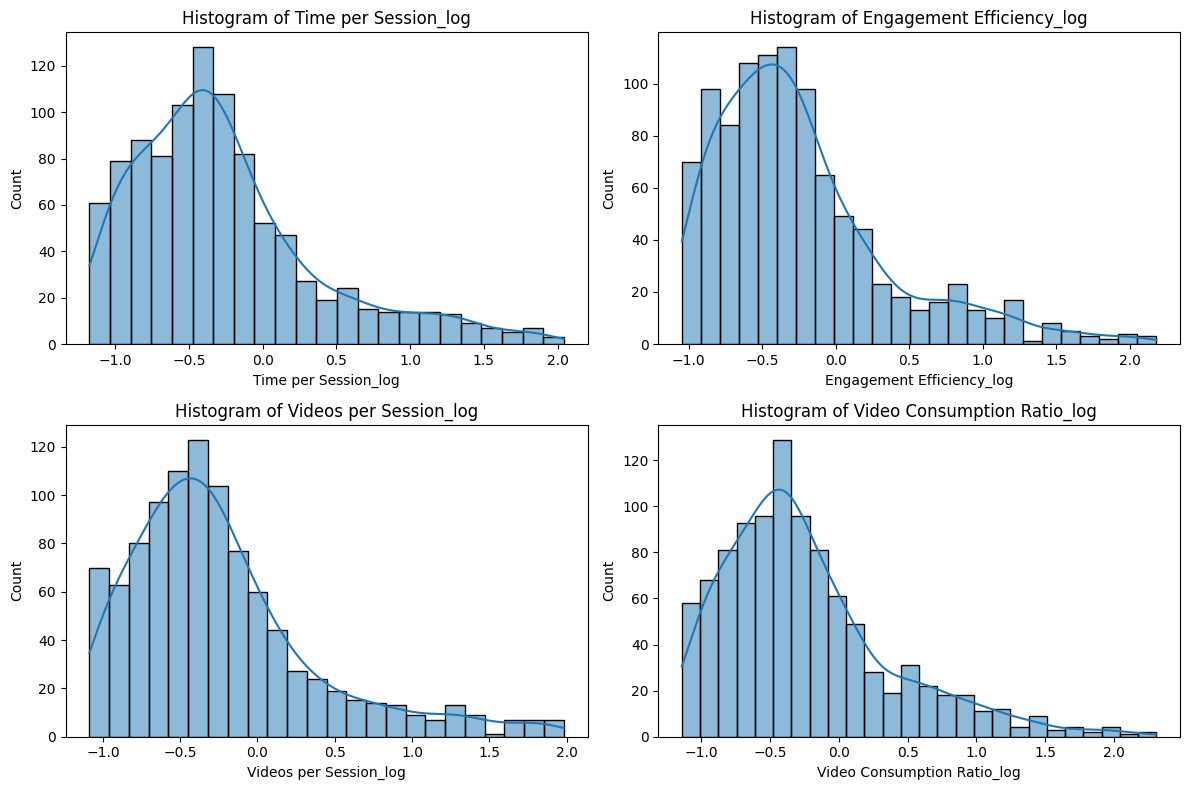

In [8]:

# Skewed ratio features to transform
skewed_features = [
    'Time per Session',
    'Engagement Efficiency',
    'Videos per Session',
    'Video Consumption Ratio'
]

# Log-transformed versions of each feature
for col in skewed_features:
    # Avoid log(0) or log of negative values by adding 1
    df_scaled[f'{col}_log'] = np.log(df_scaled[col] + 1)

plt.figure(figsize=(12, 8))
for i, col in enumerate(skewed_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df_scaled[f'{col}_log'], kde=True)
    plt.title(f'Histogram of {col}_log')
plt.tight_layout()
plt.show()

# Standardize the log-transformed features for modeling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# log_cols = [f'{col}_log' for col in skewed_features]
# df_scaled[log_cols] = scaler.fit_transform(df_scaled[log_cols])
#
# print("Summary statistics for log-transformed & scaled features:")
# print(df_scaled[log_cols].describe())


In [9]:
print('Null values in df: ', df.isnull().sum())
print("Null values in df_scaled: ", df_scaled.isnull().sum())

Null values in df:  UserID                      0
Age                         0
Gender                      0
Location                    0
Income                      0
Debt                        0
Owns Property               0
Profession                  0
Demographics                0
Platform                    0
Total Time Spent            0
Number of Sessions          0
Video ID                    0
Video Category              0
Video Length                0
Engagement                  0
Importance Score            0
Time Spent On Video         0
Number of Videos Watched    0
Scroll Rate                 0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
DeviceType                  0
OS                          0
Watch Time                  0
Self Control                0
Addiction Level             0
CurrentActivity             0
ConnectionType              0
Watch Hour                  0
Time per Session    

In [11]:
import os

dir = "../processed"
os.makedirs(dir, exist_ok=True)


df.to_csv(os.path.join(dir, 'data_clean.csv'), index=False)
df_scaled.to_csv(os.path.join(dir, 'data_scaled.csv'), index=False)